In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dfi=pd.read_csv("x_train_PP.csv")

In [3]:
dfo=pd.read_csv("y_train_u9upqBE.csv")

In [4]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219337 entries, 0 to 219336
Data columns (total 4 columns):
emergency vehicle selection     219337 non-null int64
delta selection-departure       219337 non-null int64
delta departure-presentation    219337 non-null int64
delta selection-presentation    219337 non-null int64
dtypes: int64(4)
memory usage: 6.7 MB


In [5]:
dfo.sort_values('delta departure-presentation').tail()

,emergency vehicle selection,delta selection-departure,delta departure-presentation,delta selection-presentation
196126,5103635,223,12454,12677
120233,5066545,188,16729,16917
194509,5132108,85,17895,17980
183804,4928466,59,18895,18954
208599,4830458,212,22722,22934


#### Examinons la distribution des données

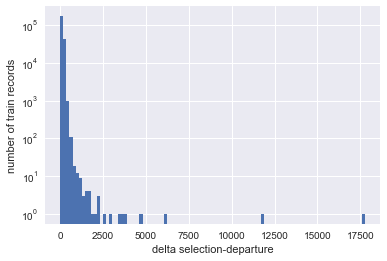

In [6]:
plt.hist(dfo['delta selection-departure'].values, bins=100)
plt.xlabel('delta selection-departure')
plt.ylabel('number of train records')
plt.yscale('log')
plt.show()

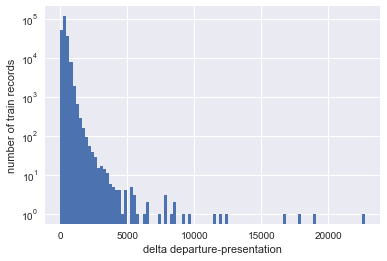

In [7]:
plt.hist(dfo['delta departure-presentation'].values, bins=100)
plt.xlabel('delta departure-presentation')
plt.ylabel('number of train records')
plt.yscale('log')
plt.show()

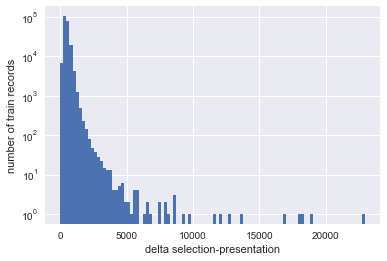

In [8]:
plt.hist(dfo['delta selection-presentation'].values, bins=100)
plt.xlabel('delta selection-presentation')
plt.ylabel('number of train records')
plt.yscale('log')
plt.show()

In [9]:
dfo.describe(percentiles=[.25, .5, .75,0.90,0.967,0.99,0.9967,0.999,0.99967,0.9999])

,emergency vehicle selection,delta selection-departure,delta departure-presentation,delta selection-presentation
count,2.193370e+05,219337.000000,219337.000000,219337.000000
mean,5.074131e+06,138.771808,356.161026,494.932834
std,2.221668e+05,77.710577,228.381939,243.194825
min,4.713701e+06,0.000000,1.000000,4.000000
25%,4.881511e+06,100.000000,231.000000,363.000000
50%,5.057150e+06,131.000000,319.000000,458.000000
75%,5.291220e+06,168.000000,434.000000,581.000000
90%,5.393567e+06,208.000000,572.000000,721.000000
96.7%,5.441366e+06,254.000000,754.000000,908.000000
99%,5.455788e+06,315.000000,1010.000000,1175.000000


### On a constaté ci dessus la présence de données aberrantes (temps de trajet très longs). Tronquons les valeurs extrêmes pour éviter ces données vraisemblablement fausses

In [10]:
dfo['delta selection-departure'][dfo['delta selection-departure']>685]=685
dfo['delta departure-presentation'][dfo['delta departure-presentation']>3215]=3215
dfo['delta selection-presentation'][dfo['delta selection-presentation']>3588]=3588

In [11]:
dft=pd.read_csv("x_test_PP.csv")

In [12]:
dfo=dfo.set_index('emergency vehicle selection')
dfi=dfi.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

In [13]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219337 entries, 5105452 to 4868867
Data columns (total 3 columns):
delta selection-departure       219337 non-null int64
delta departure-presentation    219337 non-null int64
delta selection-presentation    219337 non-null int64
dtypes: int64(3)
memory usage: 6.7 MB


### jetons un oeil à une représentation spatiale des données de départ et d'arrivée

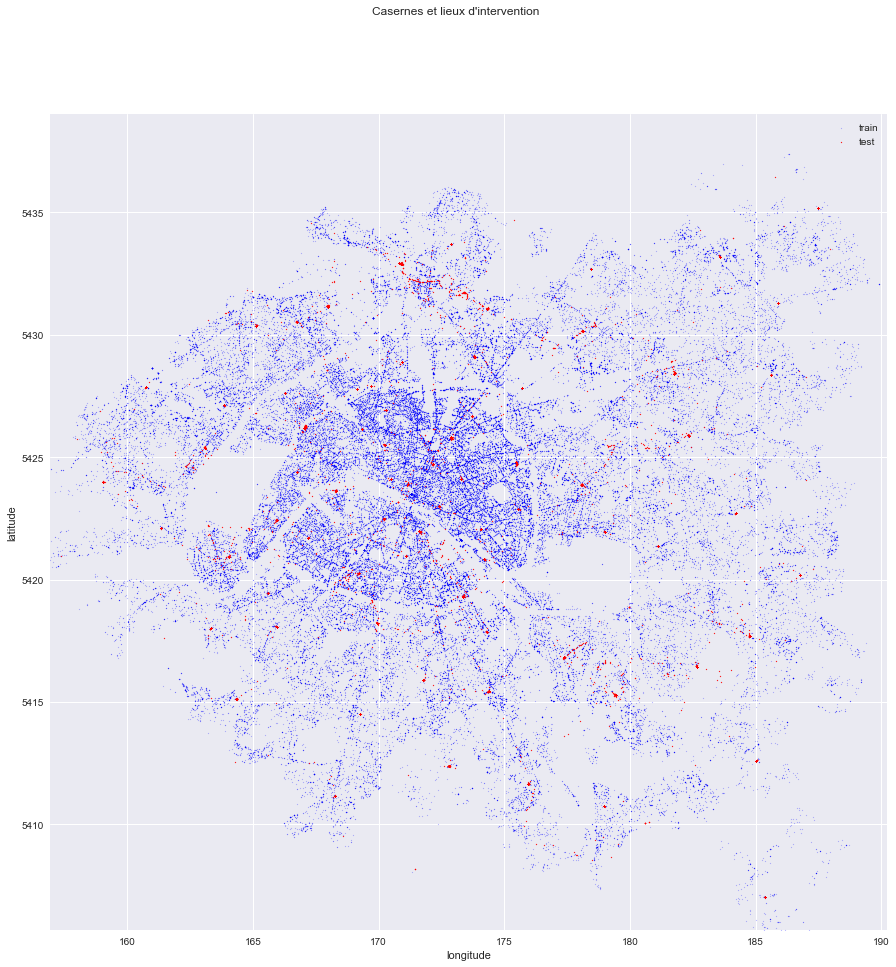

In [14]:
# les données gps sont en fraction d'angle, donc à Paris ne représentent pas les mêmes longueurs en latitude et longitude.
# corrigeons cela.
city_long_border = (73*2.15,73* 2.606)
city_lat_border = (111*48.7, 111*49.0)
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(73*dfi['longitude intervention'].values[:100000], 111*dfi['latitude intervention'].values[:100000],
              color='blue', s=1, label='train', alpha=0.2)
ax.scatter(73*dfi['longitude before departure'].values[:100000],111*dfi['latitude before departure'].values[:100000],
              color='red', s=1, label='test', alpha=0.9)
fig.suptitle('Casernes et lieux d\'intervention')
ax.legend(loc=0)
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

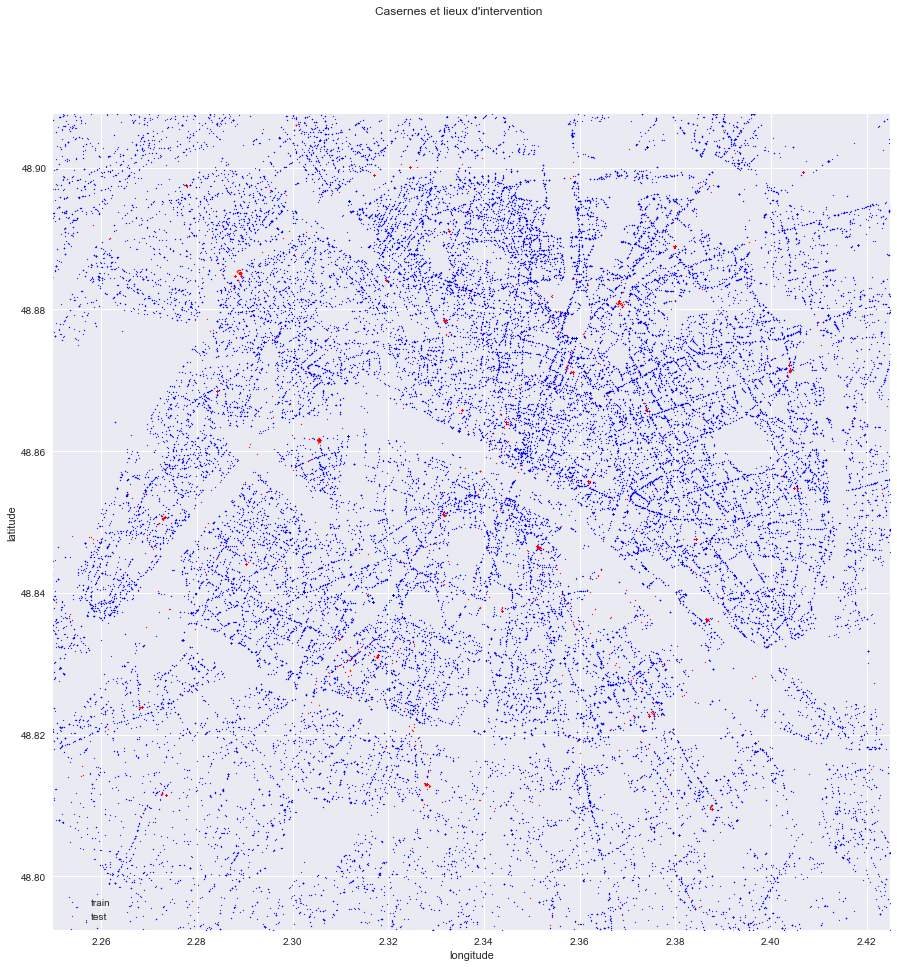

In [15]:
# avec un zoom sur Paris même
city_long_border = (2.25,2.425)
city_lat_border = (48.79245,48.907545)
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(dfi['longitude intervention'].values[:100000], dfi['latitude intervention'].values[:100000],
              color='blue', s=1, label='train', alpha=0.8)
ax.scatter(dfi['longitude before departure'].values[:100000],dfi['latitude before departure'].values[:100000],
              color='red', s=1, label='test', alpha=1.0)
fig.suptitle('Casernes et lieux d\'intervention')
ax.legend(loc=0)
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [16]:
db=pd.merge(dfi,dfo,left_index=True,right_index=True)

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219337 entries, 5105452 to 4868867
Data columns (total 28 columns):
intervention                                       219337 non-null int64
alert reason category                              219337 non-null int64
alert reason                                       219337 non-null int64
intervention on public roads                       219337 non-null int64
floor                                              219337 non-null int64
location of the event                              206627 non-null float64
longitude intervention                             219337 non-null float64
latitude intervention                              219337 non-null float64
emergency vehicle                                  219337 non-null int64
emergency vehicle type                             219337 non-null object
rescue center                                      219337 non-null int64
selection time                                     219337 non-null objec

In [18]:
db['GPS tracks datetime departure-presentation'].head()

emergency vehicle selection
5105452    2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...
4720915                                                  NaN
5365374    2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...
4741586              2018-01-15 00:42:46;2018-01-15 00:43:58
5381209    2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...
Name: GPS tracks datetime departure-presentation, dtype: object

In [19]:
db['OSRM response'][4830458]

'{"code":"Ok","routes":[{"geometry":"srwhHsc_N|A_BNwHfJpCkKnNsKj[mPpPcL~g@iGzC{v@cd@kdAiDsEmFqFoUoZko@cUuIkIaN{I}l@qJwoAqAoc@jAuZdJmi@zEsh@zBkhAqFuYgb@ot@iOsj@G{a@~DYPoKxNoQ|@{^~J}HdAm[mJlH","legs":[{"steps":[],"distance":14673.2,"duration":976,"summary":"","weight":976}],"distance":14673.2,"duration":976,"weight_name":"routability","weight":976}],"waypoints":[{"hint":"FvQFgN4KDIASAAAAIgAAAJAAAAAAAAAA0fr9QMQcXEEXZW9CAAAAABIAAAAiAAAAkAAAAAAAAABIBQAA4oIlAD9s6AI_giUASmzoAgUAbwAnhS-p","distance":12.043303,"name":"","location":[2.458338,48.786495]},{"hint":"SwIBgFcCAYCIAAAAUgAAAJsAAABSAAAArp-9Qo19YkKQM9hCaZtiQogAAABSAAAAmwAAAFIAAABIBQAAQRcnAEkc6QIyFycARBzpAgIAzxQnhS-p","distance":1.233843,"name":"Rue Octave Lapize","location":[2.561857,48.831561]}]}'

In [20]:
db['OSRM estimated distance'][4830458]

14673.2

In [21]:
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,48.837178,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""wnaiH{}uLg...",2087.3,231.7,174,259,433
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,48.904258,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""gtniHcsoNs...",2171.9,190.0,143,294,437
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,48.837382,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""itaiHgyhMw...",523.7,52.5,101,119,220
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,48.753460,NaN,"2.410667,48.753777;2.409833,48.757832;2.407194...",2018-02-03 17:43:10;2018-02-03 17:44:22;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""kdqhHgyuMy...",1581.2,126.1,136,394,530
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,48.947343,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""_~viHoljN~...",767.4,114.8,173,178,351


In [22]:
import datetime

In [23]:
# ajoutons le jour de la semaine

In [24]:
dbtrans=db[['alert reason','date key sélection','floor']]
dbtrans=dbtrans.groupby('date key sélection').mean()
dbtrans['weekday']=0
dbtrans.tail()

,alert reason,floor,weekday
date key sélection,,,
20181227,2151.153110,1.275917,0
20181228,2168.433234,1.356083,0
20181229,2148.975530,1.290375,0
20181230,2289.205564,1.346213,0
20181231,2136.205240,1.161572,0


In [25]:
for n in dbtrans.index:
    dbtrans['weekday'][n]=datetime.datetime(2018, (n // 100) % 100 ,n % 100).weekday()

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
dbtrans=dbtrans.reset_index()
dbtrans=dbtrans.drop(['alert reason','floor'],axis=1)
dbtrans.tail()

,date key sélection,weekday
330,20181227,3
331,20181228,4
332,20181229,5
333,20181230,6
334,20181231,0


In [27]:
db=db.reset_index()
dft=dft.reset_index()
db=pd.merge(db,dbtrans,how='left',on='date key sélection')
dft=pd.merge(dft,dbtrans,how='left',on='date key sélection')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,weekday
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""wnaiH{}uLg...",2087.3,231.7,174,259,433,4
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""gtniHcsoNs...",2171.9,190.0,143,294,437,0
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""itaiHgyhMw...",523.7,52.5,101,119,220,5
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,NaN,"2.410667,48.753777;2.409833,48.757832;2.407194...",2018-02-03 17:43:10;2018-02-03 17:44:22;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""kdqhHgyuMy...",1581.2,126.1,136,394,530,5
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""_~viHoljN~...",767.4,114.8,173,178,351,6


#### Changeons 'status preceding selection' en binaire

In [28]:
db['status preceding selection'].value_counts()

Rentré        214434
Disponible      4903
Name: status preceding selection, dtype: int64

In [29]:
db['status']=0
db.status[db['status preceding selection']=='Disponible']=1

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# de meme pour le test
dft['status']=0
dft.status[dft['status preceding selection']=='Disponible']=1

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#### créons une variable spécifique pour les "rescue center" de numéro élevé au cas où ça signifierai quelque chose
db['rc26']=(db['rescue center']>10000).astype(int)
dft['rc26']=(dft['rescue center']>10000).astype(int)

### transformons des variables catégorielles exprimées en entiers en suite de 0 à N (comme attentu par LightGBM)

In [33]:
#Emergency vehicle
emerg=db[['emergency vehicle','intervention','floor']]
emerg=emerg.groupby('emergency vehicle').median()
emerg=emerg.reset_index()
emerg=emerg.reset_index()
emerg['N_emv']=emerg['index']
emerg=emerg[['emergency vehicle','N_emv']]
emerg=emerg.set_index('emergency vehicle', drop=True, append=False, inplace=False, verify_integrity=False)

db=db.reset_index()
dft=dft.reset_index()
emerg=emerg.reset_index()
db=pd.merge(db,emerg,how='left',on='emergency vehicle')
dft=pd.merge(dft,emerg,how='left',on='emergency vehicle')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

del emerg
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,weekday,status,rc26,N_emv
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,"{""code"":""Ok"",""routes"":[{""geometry"":""wnaiH{}uLg...",2087.3,231.7,174,259,433,4,0,0,614
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,"{""code"":""Ok"",""routes"":[{""geometry"":""gtniHcsoNs...",2171.9,190.0,143,294,437,0,0,0,597
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,"{""code"":""Ok"",""routes"":[{""geometry"":""itaiHgyhMw...",523.7,52.5,101,119,220,5,0,0,388
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,"{""code"":""Ok"",""routes"":[{""geometry"":""kdqhHgyuMy...",1581.2,126.1,136,394,530,5,0,0,240
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,"{""code"":""Ok"",""routes"":[{""geometry"":""_~viHoljN~...",767.4,114.8,173,178,351,6,0,0,703


In [34]:
#Event Location
emerg=db[['location of the event','intervention','floor']]
emerg=emerg.groupby('location of the event').median()
emerg=emerg.reset_index()
emerg=emerg.reset_index()
emerg['N_loc']=emerg['index']
emerg=emerg[['location of the event','N_loc']]
emerg=emerg.set_index('location of the event', drop=True, append=False, inplace=False, verify_integrity=False)

db=db.reset_index()
dft=dft.reset_index()
emerg=emerg.reset_index()
db=pd.merge(db,emerg,how='left',on='location of the event')
dft=pd.merge(dft,emerg,how='left',on='location of the event')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

del emerg
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,weekday,status,rc26,N_emv,N_loc
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,2087.3,231.7,174,259,433,4,0,0,614,4.0
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,2171.9,190.0,143,294,437,0,0,0,597,38.0
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,523.7,52.5,101,119,220,5,0,0,388,47.0
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,1581.2,126.1,136,394,530,5,0,0,240,38.0
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,767.4,114.8,173,178,351,6,0,0,703,148.0


In [35]:
#Rescue Center
emerg=db[['rescue center','intervention','floor']]
emerg=emerg.groupby('rescue center').median()
emerg=emerg.reset_index()
emerg=emerg.reset_index()
emerg['N_rc']=emerg['index']
emerg=emerg[['rescue center','N_rc']]
emerg=emerg.set_index('rescue center', drop=True, append=False, inplace=False, verify_integrity=False)

db=db.reset_index()
dft=dft.reset_index()
emerg=emerg.reset_index()
db=pd.merge(db,emerg,how='left',on='rescue center')
dft=pd.merge(dft,emerg,how='left',on='rescue center')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

del emerg
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation,weekday,status,rc26,N_emv,N_loc,N_rc
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,231.7,174,259,433,4,0,0,614,4.0,10
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,190.0,143,294,437,0,0,0,597,38.0,21
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,52.5,101,119,220,5,0,0,388,47.0,55
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,126.1,136,394,530,5,0,0,240,38.0,18
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,114.8,173,178,351,6,0,0,703,148.0,4


In [36]:
#Alert Reason 
emerg=db[['alert reason','intervention','floor']]
emerg=emerg.groupby('alert reason').median()
emerg=emerg.reset_index()
emerg=emerg.reset_index()
emerg['N_ar']=emerg['index']
emerg=emerg[['alert reason','N_ar']]
emerg=emerg.set_index('alert reason', drop=True, append=False, inplace=False, verify_integrity=False)

db=db.reset_index()
dft=dft.reset_index()
emerg=emerg.reset_index()
db=pd.merge(db,emerg,how='left',on='alert reason')
dft=pd.merge(dft,emerg,how='left',on='alert reason')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

del emerg
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,delta selection-departure,delta departure-presentation,delta selection-presentation,weekday,status,rc26,N_emv,N_loc,N_rc,N_ar
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,174,259,433,4,0,0,614,4.0,10,62
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,143,294,437,0,0,0,597,38.0,21,61
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,101,119,220,5,0,0,388,47.0,55,38
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,136,394,530,5,0,0,240,38.0,18,61
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,173,178,351,6,0,0,703,148.0,4,83


#### transformons EMergency Vehicule Type en numérique

In [37]:
emerg=db[['emergency vehicle type','intervention','floor']]
emerg=emerg.groupby('emergency vehicle type').median()
emerg=emerg.reset_index()
emerg=emerg.reset_index()
emerg['evt']=emerg['index']
emerg=emerg[['emergency vehicle type','evt']]
emerg=emerg.set_index('emergency vehicle type', drop=True, append=False, inplace=False, verify_integrity=False)
emerg.head()

,evt
emergency vehicle type,
AR,0
BEAA BSPP,1
CA,2
CCR BSPP,3
CD BSPP,4


In [38]:
db=db.reset_index()
dft=dft.reset_index()
emerg=emerg.reset_index()
db=pd.merge(db,emerg,how='left',on='emergency vehicle type')
dft=pd.merge(dft,emerg,how='left',on='emergency vehicle type')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')
db.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,...,delta departure-presentation,delta selection-presentation,weekday,status,rc26,N_emv,N_loc,N_rc,N_ar,evt
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,VSAV BSPP,...,259,433,4,0,0,614,4.0,10,62,69
5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,VSAV BSPP,...,294,437,0,0,0,597,38.0,21,61,69
4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,VSAV BSPP,...,119,220,5,0,0,388,47.0,55,38,69
4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,VSAV BSPP,...,394,530,5,0,0,240,38.0,18,61,69
4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,FA,...,178,351,6,0,0,703,148.0,4,83,18


#### supprimons les variables avec trop de NaN,

In [39]:
db=db.drop(['delta position gps previous departure-departure','GPS tracks departure-presentation','GPS tracks datetime departure-presentation',
            'status preceding selection','OSRM response','selection time','emergency vehicle type'],axis=1)
dft=dft.drop(['delta position gps previous departure-departure','GPS tracks departure-presentation','GPS tracks datetime departure-presentation',
            'status preceding selection','OSRM response','selection time','emergency vehicle type'],axis=1)

In [40]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219337 entries, 5105452 to 4868867
Data columns (total 29 columns):
intervention                                  219337 non-null int64
alert reason category                         219337 non-null int64
alert reason                                  219337 non-null int64
intervention on public roads                  219337 non-null int64
floor                                         219337 non-null int64
location of the event                         206627 non-null float64
longitude intervention                        219337 non-null float64
latitude intervention                         219337 non-null float64
emergency vehicle                             219337 non-null int64
rescue center                                 219337 non-null int64
date key sélection                            219337 non-null int64
time key sélection                            219337 non-null int64
delta status preceding selection-selection    219337 non-nul

In [41]:
## remplissons les NaN pour Location of the event
db=db.fillna(99)
dft=dft.fillna(99)

### Feature engineering : on calcule des distances entre point de départ et d'arrivée. 

#### distance euclidienne

In [42]:
db['distL']=((db['longitude before departure']-db['longitude intervention'])*73)**2
db['distL']=db['distL']+(((db['latitude before departure']-db['latitude intervention'])*111)**2)
db['distL']=(db['distL'])**(0.5)

In [43]:
## de même pour le test
dft['distL']=((dft['longitude before departure']-dft['longitude intervention'])*73)**2
dft['distL']=dft['distL']+(((dft['latitude before departure']-dft['latitude intervention'])*111)**2)
dft['distL']=(dft['distL'])**(0.5)

#### et distance de Manhattan

In [44]:
db['distM']=abs((db['longitude before departure']-db['longitude intervention'])*73)
db['distM']=db['distM']+abs((db['latitude before departure']-db['latitude intervention'])*111)

In [45]:
dft['distM']=abs((dft['longitude before departure']-dft['longitude intervention'])*73)
dft['distM']=dft['distM']+abs((dft['latitude before departure']-dft['latitude intervention'])*111)

In [46]:
y2=db[['delta selection-departure','delta departure-presentation','delta selection-presentation',]]

In [47]:
db=db.drop(['delta selection-departure','delta departure-presentation','delta selection-presentation',],axis=1)

#### Ajoutons les heures de lever et coucher du soleil : peut-être va-t-on plus ou moins vite suivant qu'il fait nuit ou pas

In [48]:
dfn=pd.read_csv("coucherlever.csv")
dfn['date key sélection']=dfn['Day']
dfn=dfn.drop(['Unnamed: 0','Day'],axis=1)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Lever                 365 non-null int64
Coucher               365 non-null int64
date key sélection    365 non-null int64
dtypes: int64(3)
memory usage: 8.6 KB


In [49]:
db=db.reset_index()
db=pd.merge(db,dfn,how='left',on='date key sélection')
db=db.set_index('emergency vehicle selection')

In [50]:
dft=dft.reset_index()
dft=pd.merge(dft,dfn,how='left',on='date key sélection')
dft=dft.set_index('emergency vehicle selection')

## ajoutons des données météo

In [51]:
db['jourheure']=((db['time key sélection'] // 10000) // 3 )*3
db['jourheure']=db['date key sélection']*100+ db['jourheure']
db.head()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,...,N_emv,N_loc,N_rc,N_ar,evt,distL,distM,Lever,Coucher,jourheure
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,2447,...,469,47.0,14,61,69,0.606744,0.795980,60100,215000,2018070818
4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,2464,...,394,35.0,30,42,27,1.664990,2.177152,84700,170300,2018010409
5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,2438,...,467,38.0,5,62,69,1.861218,2.591997,80500,170500,2018111609
4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,2510,...,600,35.0,72,61,69,1.294115,1.600982,84200,171800,2018011500
5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,2478,...,554,4.0,42,61,69,1.932958,2.732374,81700,165700,2018112400


In [52]:
dft['jourheure']=((dft['time key sélection'] // 10000) // 3 )*3
dft['jourheure']=dft['date key sélection']*100+ dft['jourheure']
dft.head()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,...,N_emv,N_loc,N_rc,N_ar,evt,distL,distM,Lever,Coucher,jourheure
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
5271704,13535032,3,2113,0,2,136.0,2.464084,48.818439,5755,2483,...,611.0,35.0,47,33.0,69.0,2.800355,3.753717,75500,192300,2018100212
5092931,13244794,3,2113,0,0,228.0,2.325948,48.925197,3100,2462,...,256.0,122.0,28,33.0,69.0,1.848961,2.247177,55700,215200,2018070312
5153756,13345422,3,2112,1,0,148.0,2.519115,48.859304,3538,2482,...,317.0,47.0,46,32.0,69.0,0.725658,0.960559,62600,212800,2018073012
5355572,13663044,3,2120,0,0,201.0,2.366121,48.868379,6042,2450,...,730.0,95.0,17,38.0,69.0,0.635159,0.866457,75900,171000,2018111203
5178915,13386354,3,2113,1,0,148.0,2.345241,48.860093,4466,2493,...,450.0,47.0,57,33.0,69.0,0.453843,0.492945,64300,210700,2018081218


In [53]:
dfp=pd.read_csv('pluie_3h.csv')
dfp=dfp.drop('Unnamed: 0',axis=1)
dfp['jourheure']=dfp['jourheure'] // 100
dfp.head()

,rr1,rr3,rr6,vv,t,jourheure
0,0.0,0.0,0.0,19640,281.55,2018010100
1,0.0,0.0,0.0,30000,280.95,2018010103
2,0.0,0.0,0.0,30000,279.15,2018010106
3,-0.1,-0.1,-0.1,30000,280.35,2018010109
4,3.7,7.5,7.5,6000,281.25,2018010112


In [54]:
db=db.reset_index()
dft=dft.reset_index()
db=pd.merge(db,dfp,how='left',on='jourheure')
dft=pd.merge(dft,dfp,how='left',on='jourheure')
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

In [55]:
db=db.fillna(db.median())
dft=dft.fillna(dft.median())

In [56]:
# n'ajoutons qu'une variable à la fois
db=db.drop(['rr1','rr6'],axis=1)
dft=dft.drop(['rr1','rr6'],axis=1)

## Insérons une donnée de traffic moyen

In [57]:
dtraf=pd.read_csv('traffic.csv')
dtraf=dtraf.drop('numero',axis=1)
dtraf.head()

,etat_trafic,nt_1h
0,0.719187,2018010102
1,0.750794,2018010103
2,0.717051,2018010104
3,0.679854,2018010105
4,0.671351,2018010106


In [58]:
dtraf['jourheure']=dtraf['nt_1h']
dtraf=dtraf.drop('nt_1h',axis=1)

In [59]:
db.head()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,...,N_ar,evt,distL,distM,Lever,Coucher,jourheure,rr3,vv,t
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,2447,...,61,69,0.606744,0.795980,60100,215000,2018070818,0.0,25000.0,300.65
4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,2464,...,42,27,1.664990,2.177152,84700,170300,2018010409,1.4,20000.0,286.75
5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,2438,...,62,69,1.861218,2.591997,80500,170500,2018111609,0.2,400.0,280.25
4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,2510,...,61,69,1.294115,1.600982,84200,171800,2018011500,0.0,6480.0,277.75
5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,2478,...,61,69,1.932958,2.732374,81700,165700,2018112400,3.4,710.0,279.55


In [60]:
db=db.reset_index()
db=pd.merge(db,dtraf,how='left',on='jourheure')
db.tail()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,evt,distL,distM,Lever,Coucher,jourheure,rr3,vv,t,etat_trafic
219332,4864471,12886829,3,2163,0,2,104.0,2.227774,48.831789,5760,...,69,1.550135,2.028249,70400,185400,2018031603,0.0,17000.0,279.95,0.643979
219333,5357433,13665659,3,2162,0,0,139.0,2.520397,48.907261,5728,...,69,1.633509,1.932471,75900,171000,2018111221,0.0,9420.0,283.05,0.790922
219334,4907336,12953377,3,2120,1,0,148.0,2.337892,48.839588,4317,...,69,0.493222,0.673011,71800,202600,2018040721,0.0,25000.0,289.45,0.859991
219335,4784220,12759582,3,2162,0,0,139.0,2.403335,48.763714,3077,...,69,1.248179,1.650508,82000,174800,2018020315,0.6,14000.0,277.55,0.738824
219336,4868867,12893506,6,2422,0,0,257.0,2.522097,48.947993,5966,...,18,0.529661,0.596874,70000,185700,2018031812,-0.1,14000.0,273.95,0.646502


In [61]:
dft=dft.reset_index()
dft=pd.merge(dft,dtraf,how='left',on='jourheure')
dft.tail()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,evt,distL,distM,Lever,Coucher,jourheure,rr3,vv,t,etat_trafic
108028,4746141,12702583,3,2162,0,3,140.0,2.362247,48.805807,5887,...,69.0,1.903584,2.270057,84000,172000,2018011709,-0.1,25000.0,277.05,0.763703
108029,4798356,12782252,3,2162,0,3,140.0,2.316238,48.895093,2067,...,27.0,2.171194,2.992571,81000,175900,2018021009,0.0,22000.0,272.15,0.630573
108030,4932682,12993099,3,2124,0,0,139.0,2.439496,48.861385,4189,...,18.0,0.269888,0.281664,65200,204600,2018042012,0.0,18260.0,300.85,0.821392
108031,4789251,12767655,3,2113,0,0,196.0,2.287492,48.848762,4541,...,69.0,0.554202,0.720672,81600,175300,2018020609,0.4,2500.0,273.25,0.738854
108032,5353442,13659798,3,2162,0,0,139.0,2.408357,48.801084,4536,...,69.0,1.559469,1.649188,75800,171100,2018111100,0.0,25000.0,284.85,0.690993


In [62]:
db=db.fillna(db.median())
dft=dft.fillna(dft.median())

In [63]:
db=db.set_index('emergency vehicle selection')
dft=dft.set_index('emergency vehicle selection')

In [64]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108033 entries, 5271704 to 5353442
Data columns (total 35 columns):
intervention                                  108033 non-null int64
alert reason category                         108033 non-null int64
alert reason                                  108033 non-null int64
intervention on public roads                  108033 non-null int64
floor                                         108033 non-null int64
location of the event                         108033 non-null float64
longitude intervention                        108033 non-null float64
latitude intervention                         108033 non-null float64
emergency vehicle                             108033 non-null int64
rescue center                                 108033 non-null int64
date key sélection                            108033 non-null int64
time key sélection                            108033 non-null int64
delta status preceding selection-selection    108033 non-nul

## Modélisons

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db, y2, random_state=42)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
import xgboost as xgb
import lightgbm as lgb

In [68]:
from sklearn.metrics import r2_score

In [70]:
len(X_train.columns)

35

### Supprimons les variables inutiles

In [90]:
X_sd=X_train.drop(['rc26','N_loc','N_ar','distM','OSRM estimated distance','Coucher'],axis=1)
X_tsd=X_test.drop(['rc26','N_loc','N_ar''distM','OSRM estimated distance','Coucher'],axis=1)

### Nous utilisons deux modèles distincts pour prédire le temps de préparation et le temps de trajet

In [165]:
params={  
    'max_depth': 13,
    'num_leaves':200,
    'learning_rate': 0.05,
    'n_estimators': 350,
    'colsample_bytree': 0.5,
    'subsample': 0.9,
    'reg_lambda': 0.2,
    'min_data_in_leaf':100
}
lgb_train = lgb.Dataset(X_sd, y_train['delta selection-departure'],categorical_feature=['evt','N_rc'])
#lgb_train = lgb.Dataset(X_sd, y_train['delta selection-departure'])
gbl2 = lgb.train(params,lgb_train)
y_pred=gbl2.predict(X_tsd)
y_p=gbl2.predict(X_sd)
print(r2_score(y_train['delta selection-departure'], y_p))
print(r2_score(y_test['delta selection-departure'], y_pred))

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


0.48009044194643846
0.30754224030951105


In [206]:
X_dp=X_train.drop(['delta status preceding selection-selection','t','status'],axis=1)
X_tdp=X_test.drop(['delta status preceding selection-selection','t','status'],axis=1)
params={  
    'max_depth': 9,
    'num_leaves': 250,
    'subsample_freq': 2,
    'learning_rate': 0.06,
    'n_estimators': 600,
    'colsample_bytree': 0.8,
    'subsample': 0.9,
    'reg_lambda': 0.01,
    'min_data_in_leaf':150
}
lgb_train = lgb.Dataset(X_dp, y_train['delta departure-presentation'])
gbl2 = lgb.train(params,lgb_train)
X_tdp=X_test.drop(['delta status preceding selection-selection','t','status'],axis=1)
y_pred=gbl2.predict(X_tdp)
y_p=gbl2.predict(X_dp)
print(r2_score(y_train['delta departure-presentation'], y_p))
print(r2_score(y_test['delta departure-presentation'], y_pred))

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.4821802574022299
0.36364050037297735


# Implémentons

In [207]:
db.columns

Index(['intervention', 'alert reason category', 'alert reason',
       'intervention on public roads', 'floor', 'location of the event',
       'longitude intervention', 'latitude intervention', 'emergency vehicle',
       'rescue center', 'date key sélection', 'time key sélection',
       'delta status preceding selection-selection',
       'departed from its rescue center', 'longitude before departure',
       'latitude before departure', 'OSRM estimated distance',
       'OSRM estimated duration', 'weekday', 'status', 'rc26', 'N_emv',
       'N_loc', 'N_rc', 'N_ar', 'evt', 'distL', 'distM', 'Lever', 'Coucher',
       'jourheure', 'rr3', 'vv', 't', 'etat_trafic'],
      dtype='object')

In [208]:
db_sd=db.drop(['rc26','N_loc','N_ar','distM','OSRM estimated distance','Coucher'],axis=1)
db_dp=db.drop(['delta status preceding selection-selection','t','status'],axis=1)

In [209]:
df_sd=dft.drop(['rc26','N_loc','N_ar','distM','OSRM estimated distance','Coucher'],axis=1)
df_dp=dft.drop(['delta status preceding selection-selection','t','status'],axis=1)

In [210]:
#db_sp=db.drop('t',axis=1)
#df_sp=dft.drop('t',axis=1)
db_sp=db
df_sp=dft
#db_sp=db.drop('status',axis=1)
#df_sp=dft.drop('status',axis=1)

In [211]:
params={  
    'max_depth': 13,
    'num_leaves':200,
    'learning_rate': 0.05,
    'n_estimators': 350,
    'colsample_bytree': 0.5,
    'subsample': 0.9,
    'reg_lambda': 0.2,
    'min_data_in_leaf':100
}
lgb_train = lgb.Dataset(db_sd, dfo['delta selection-departure'],categorical_feature=['evt','N_rc'])
gb_sd = lgb.train(params,lgb_train)

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [214]:
params={  
    'max_depth': 9,
    'num_leaves': 250,
    'subsample_freq': 2,
    'learning_rate': 0.06,
    'n_estimators': 600,
    'colsample_bytree': 0.8,
    'subsample': 0.9,
    'reg_lambda': 0.01,
    'min_data_in_leaf':150
}
lgb_train = lgb.Dataset(db_dp, dfo['delta departure-presentation'])
gb_dp = lgb.train(params,lgb_train)

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [215]:
# entrainons les modèles sur tout l'échantillon
#gb_sd = lgb.LGBMRegressor(max_depth= 11,min_data_in_leaf=300)
#gb_sd.fit(db_sd,dfo['delta selection-departure'])
pred_sd=gb_sd.predict(df_sd)
#gb_dp = lgb.LGBMRegressor(max_depth= 6,min_data_in_leaf=60)
#gb_dp.fit(db_dp,dfo['delta departure-presentation'])
pred_dp=gb_dp.predict(df_dp)
#gb_sp = lgb.LGBMRegressor(max_depth= 7,min_data_in_leaf=100)
#gb_sp.fit(db_sp,dfo['delta selection-presentation'])
#pred_sp=gb_sp.predict(df_sp)

## on prend la somme des deux temps prédits

In [216]:
dft['delta selection-departure']=pred_sd
dft['delta departure-presentation']=pred_dp
dft['delta selection-presentation']=dft['delta selection-departure']+dft['delta departure-presentation']

In [217]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108033 entries, 5271704 to 5353442
Data columns (total 38 columns):
intervention                                  108033 non-null int64
alert reason category                         108033 non-null int64
alert reason                                  108033 non-null int64
intervention on public roads                  108033 non-null int64
floor                                         108033 non-null int64
location of the event                         108033 non-null float64
longitude intervention                        108033 non-null float64
latitude intervention                         108033 non-null float64
emergency vehicle                             108033 non-null int64
rescue center                                 108033 non-null int64
date key sélection                            108033 non-null int64
time key sélection                            108033 non-null int64
delta status preceding selection-selection    108033 non-nul

In [218]:
dft.tail()

,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,...,Lever,Coucher,jourheure,rr3,vv,t,etat_trafic,delta selection-departure,delta departure-presentation,delta selection-presentation
emergency vehicle selection,,,,,,,,,,,,,,,,,,,,,
4746141,12702583,3,2162,0,3,140.0,2.362247,48.805807,5887,2465,...,84000,172000,2018011709,-0.1,25000.0,277.05,0.763703,131.458657,529.408098,660.866755
4798356,12782252,3,2162,0,3,140.0,2.316238,48.895093,2067,2441,...,81000,175900,2018021009,0.0,22000.0,272.15,0.630573,139.608474,598.201297,737.809771
4932682,12993099,3,2124,0,0,139.0,2.439496,48.861385,4189,2478,...,65200,204600,2018042012,0.0,18260.0,300.85,0.821392,139.239551,158.056246,297.295797
4789251,12767655,3,2113,0,0,196.0,2.287492,48.848762,4541,2463,...,81600,175300,2018020609,0.4,2500.0,273.25,0.738854,118.424383,225.379211,343.803593
5353442,13659798,3,2162,0,0,139.0,2.408357,48.801084,4536,2472,...,75800,171100,2018111100,0.0,25000.0,284.85,0.690993,194.519773,436.083751,630.603524


In [219]:
df_sub=dft[['delta selection-departure', 'delta departure-presentation','delta selection-presentation']]

In [220]:
df_sub.tail()

,delta selection-departure,delta departure-presentation,delta selection-presentation
emergency vehicle selection,,,
4746141,131.458657,529.408098,660.866755
4798356,139.608474,598.201297,737.809771
4932682,139.239551,158.056246,297.295797
4789251,118.424383,225.379211,343.803593
5353442,194.519773,436.083751,630.603524


In [221]:
# avec quelques tentatives de fine tuning sur des variables catégorielles notamment
df_sub.to_csv('./submit21.csv', sep=",")

# best to date 0.2225